In [142]:
import pandas as pd

# Questions to ask
#### What were the highest selling games?
#### Which genre sells the most?
#### Which developer sells the most?
#### In which release month does the games sell the most?

In [159]:
df = pd.read_csv('ps4.csv')

### What were the highest selling games?

In [160]:
df['Copies sold'] = df['Copies sold'].str.split().str[0].astype(float)
df.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


In [145]:
topTenDf = df.sort_values('Copies sold', ascending=False).head(10).reset_index()

In [146]:
import matplotlib.pyplot as plt

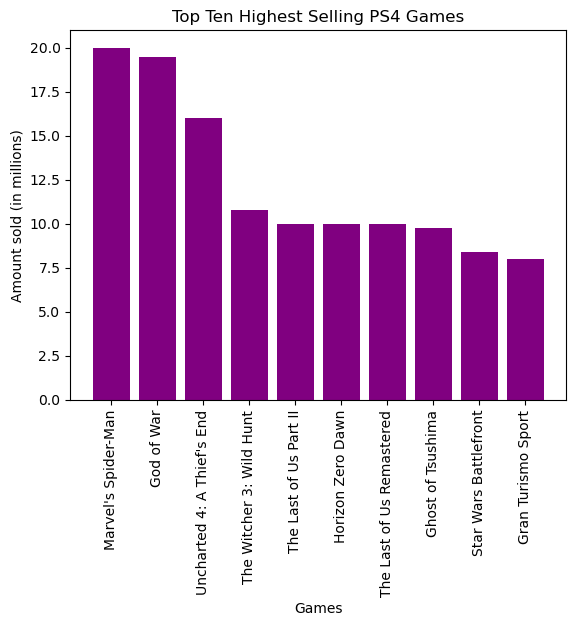

In [147]:
plt.bar(topTenDf['Game'], topTenDf['Copies sold'], color='purple')
plt.xticks(topTenDf['Game'], rotation='vertical')
plt.xlabel('Games')
plt.ylabel('Amount sold (in millions)')
plt.title('Top Ten Highest Selling PS4 Games')
plt.show()

### Which genre sells the most?

In [148]:
g = df.groupby('Genre(s)').sum().reset_index()

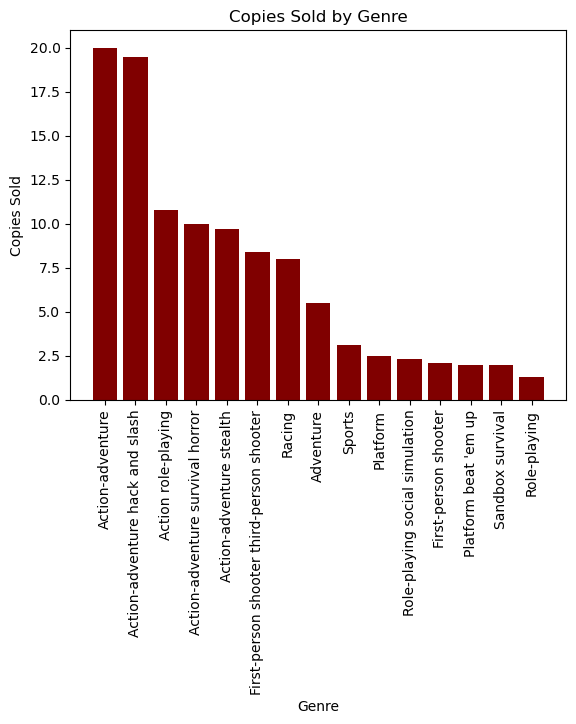

In [149]:
genres = df['Genre(s)']
copies_sold = df['Copies sold']

plt.bar(genres, copies_sold, color="maroon")
plt.xlabel('Genre')
plt.ylabel('Copies Sold')
plt.title('Copies Sold by Genre')
plt.xticks(rotation=90)

plt.show()

### Which developer sells the most?

In [150]:
g2 = df.groupby('Developer(s)').sum().sort_values('Copies sold', ascending=False).reset_index()


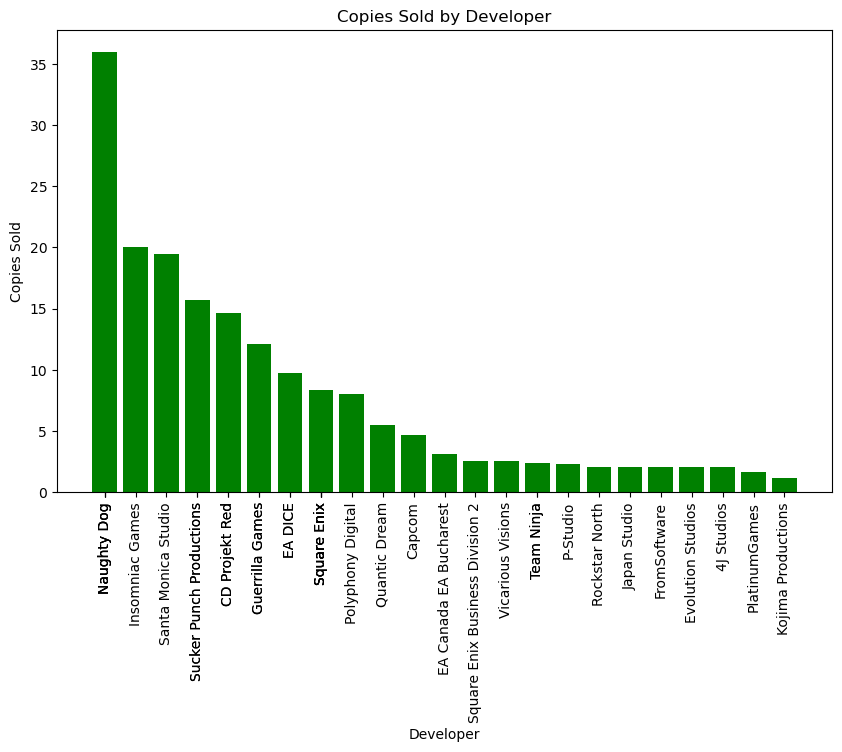

In [151]:
plt.figure(figsize=(10, 6))
plt.bar(g2['Developer(s)'], g2['Copies sold'],  color="green")
plt.xlabel('Developer')
plt.ylabel('Copies Sold')
plt.title('Copies Sold by Developer')
plt.xticks(df['Developer(s)'], rotation="vertical")

plt.show()

### In which release month does the games sell the most?

In [152]:
df.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


In [153]:
df['Release month'] = df['Release date[a]'].str.split().str[0]
df.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s),Release month
0,Marvel's Spider-Man,20.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment,September
1,God of War,19.5,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment,April
2,Uncharted 4: A Thief's End,16.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment,May
3,The Witcher 3: Wild Hunt,10.8,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt,May
4,The Last of Us Part II,10.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment,June


In [154]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Release month'] = pd.Categorical(df['Release month'], categories=month_order, ordered=True)
g3 = df.groupby('Release month').sum().reset_index()
g3

,Release month,Copies sold
0,January,5.67
1,February,12.60
2,March,9.40
3,April,24.50
4,May,32.30
5,June,12.50
6,July,22.03
7,August,0.00
8,September,26.22
9,October,13.60


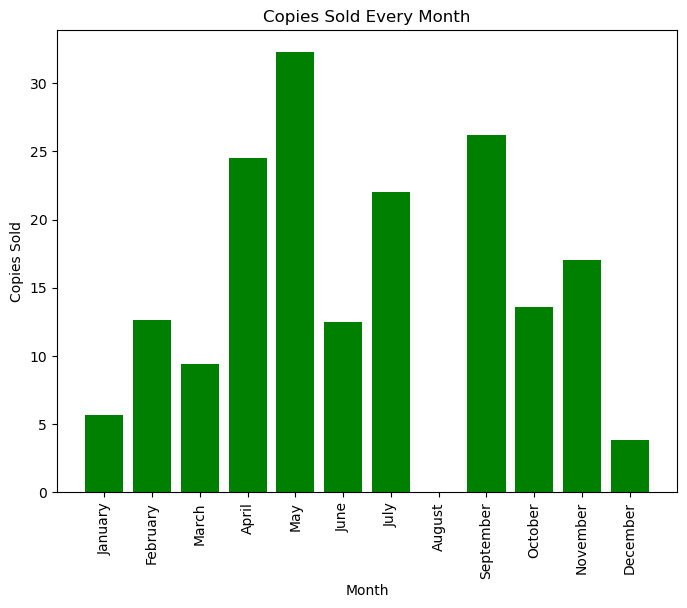

In [167]:
plt.figure(figsize=(8, 6))
plt.bar(g3['Release month'], g3['Copies sold'],  color="green")
plt.xlabel('Month')
plt.ylabel('Copies Sold')
plt.title('Copies Sold Every Month')
plt.xticks(g3['Release month'], rotation="vertical")

plt.show()